# Logistic Regression with Python
For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning!

We'll be trying to predict a classification- survival or deceased. Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

### Import Libraries
Let's import some libraries to get started!

### Steps to Consider
1. Check for missing values (Null/Nan) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Lets read the data into Pandas DataFrame

In [2]:
url = r"E:\Project\Anaconda\csv\eda\titanic_train.csv"
df = pd.read_csv(url)

In [72]:
df.head(100)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
..          ...       ...     ...   
95           96         0       3   
96           97         0       1   
97           98         1       1   
98           99         1       2   
99          100         0       2   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
..                                                ...     ...   ...    ...   
95                        Shorney, Mr. Charles Joseph    male   NaN      0   
96                          Goldschmidt, Mr. George B    male  71.0      0   
97                    Greenfield, Mr. William Bertram    male  23.0      0   
98               Doling, Mrs. John T (Ada Julia Bone)  female  34.0      0   
99                                  Kantor, Mr. Sinai    male  34.0      1   

    Parch            Ticket     Fare    Cabin Embarked  
0       0         A/5 21171   7.2500      NaN        S  
1       0          PC 17599  71.2833      C85        C  
2       0  STON/O2. 3101282   7.9250      NaN        S  
3       0            113803  53.1000     C123        S  
4       0            373450   8.0500      NaN        S  
..    ...               ...      ...      ...      ...  
95      0            374910   8.0500      NaN        S  
96      0          PC 17754  34.6542       A5        C  
97      1          PC 17759  63.3583  D10 D12        C  
98      1            231919  23.0000      NaN        S  
99      0            244367  26.0000      NaN        S  

[100 rows x 12 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


### 1st step is to fill Missing Values

In [24]:
df.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Heatmap(Condition)
- what ever condition you put inside the Heatmap it will differentiate True and False values by colours.


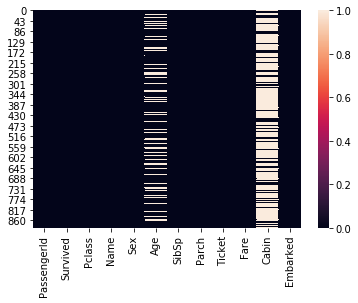

In [26]:
# simple Heatmap
sns.heatmap(df.isnull())

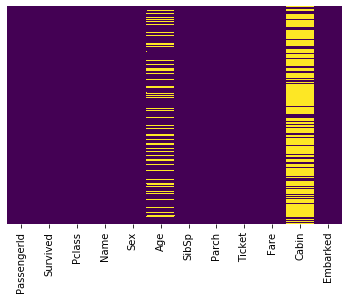

In [23]:
# Heatmap with some specific param which make the visualization more understandable.
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

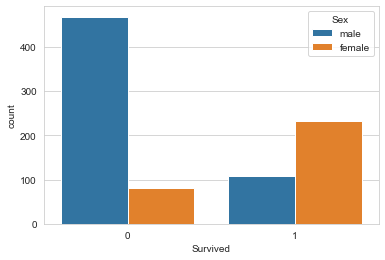

In [39]:
# sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=df)

### comparing survial (died/survied)
We are comparing how many survied and how many died using Counter plot.

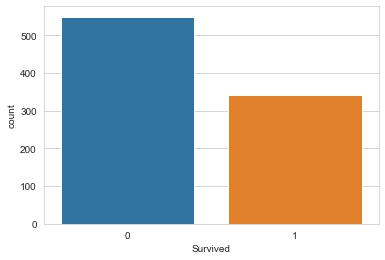

In [32]:
sns.set_style("whitegrid") # setting style 
sns.countplot(x='Survived', data=df) # look for Survived column from df

In [31]:
df['Survived'].unique()

array([0, 1], dtype=int64)

### ### comparing survial (male/female)
- here hue parameter is like measure how many survived and died based on male and female column.

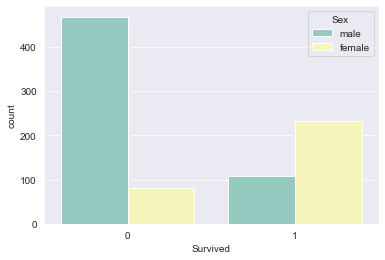

In [51]:
sns.set_style("darkgrid")
sns.countplot(x='Survived', hue='Sex', data=df, palette='Set3') 

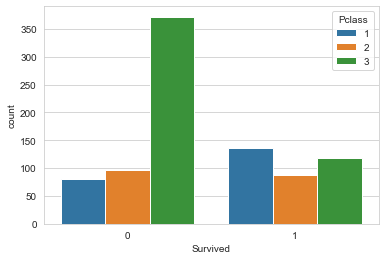

In [47]:
sns.countplot(x='Survived',hue='Pclass', data=df)

In [65]:
age_val_count = df['Age'].value_counts()

In [71]:
age_val_count

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
Name: Age, Length: 80, dtype: int64

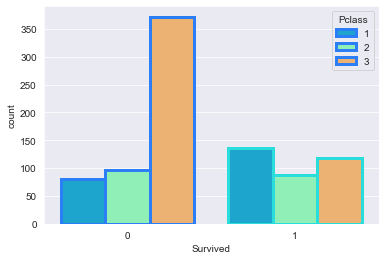

In [60]:
sns.countplot(x='Survived', hue='Pclass', data=df, palette='rainbow',                        linewidth=3, edgecolor=sns.color_palette("rainbow", 5))

In [ ]:
# Findout the distribution of AGE

### Practice

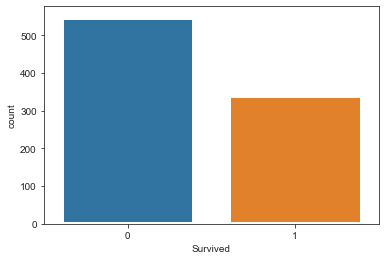

In [31]:
sns.countplot(x='Survived', data=df,linewidth=5,edgecolor=sns.color_palette("dark", 3))

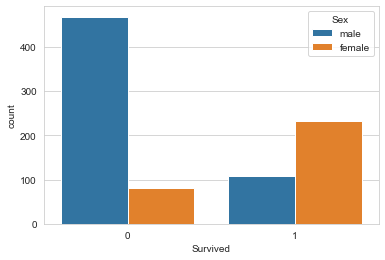

In [36]:
zzsns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=df)

### Ploting the distribution of Age
- Using distplot
- but first of all we have to temprarily remove nan values because there are so many nan values in Age column.